## Safaricom(SCOM) stock price prediction 

#### Content
1. Loading the SCOM timeseries data 
2. 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from numpy import log

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [2]:
# load the data 
df = pd.read_csv("/media/danlof/dan_files/data_science_codes/Timeseries/arima/HistoricalPrices.csv")
df.head()

,Date,Open,High,Low,Close,Volume
0,06/11/24,18.15,18.15,18.00,18.05,9094600
1,06/10/24,18.35,18.35,18.00,18.10,270300
2,06/07/24,18.35,18.35,18.25,18.35,3250900
3,06/06/24,18.05,18.70,18.00,18.35,4895200
4,06/05/24,18.05,18.20,18.00,18.05,5474800


In [3]:
# stripe the column names of any white space 
# Clean the column names
df.columns = df.columns.str.strip().str.lower()

In [4]:
# parse the dates and set the date column as index 
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.head()

/tmp/ipykernel_4202/4246572663.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


,open,high,low,close,volume
date,,,,,
2024-06-11,18.15,18.15,18.00,18.05,9094600
2024-06-10,18.35,18.35,18.00,18.10,270300
2024-06-07,18.35,18.35,18.25,18.35,3250900
2024-06-06,18.05,18.70,18.00,18.35,4895200
2024-06-05,18.05,18.20,18.00,18.05,5474800


In [5]:
print(df.columns)

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')


Text(0, 0.5, 'Closing stock prices')

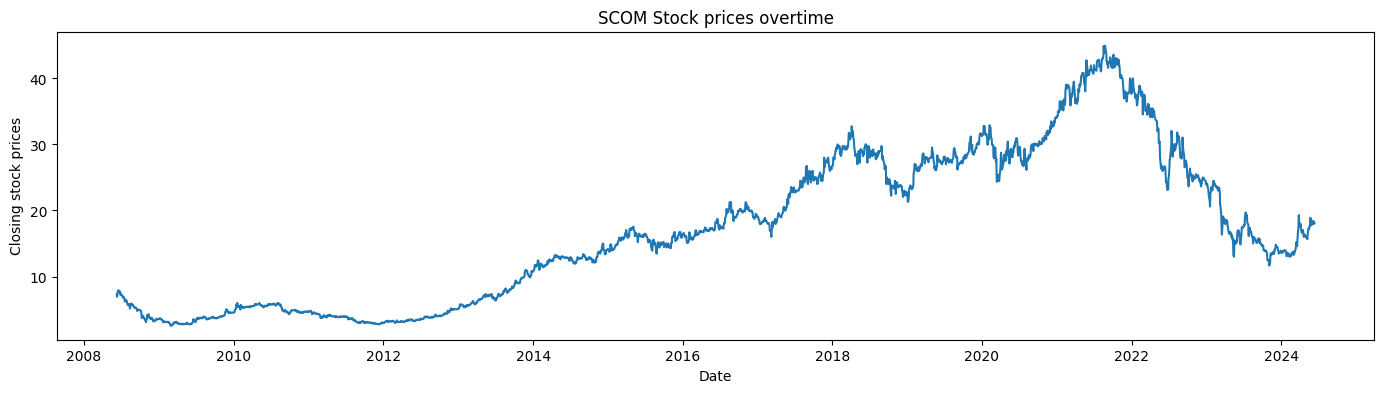

In [6]:
# Visualize the data 
df.dropna(inplace=True)
plt.figure(figsize=(17,4))
plt.plot(df['close'])
plt.title("SCOM Stock prices overtime")
plt.xlabel('Date')
plt.ylabel('Closing stock prices')

####  Step1 : Check if the series is stationary
- we will use the ADF test


In [7]:
result = adfuller(df['close'].dropna())
print("ADF statistics: %f" %result[0])
print('p-value: %f' %result[1])

ADF statistics: -0.691387
p-value: 0.848968


##### solution 1
- From the above we see that p-value(0.85)> level of significance 0.05 , which leads to us concluding that the series is non-stationary.

In [8]:
df['close'].isna().sum()

0

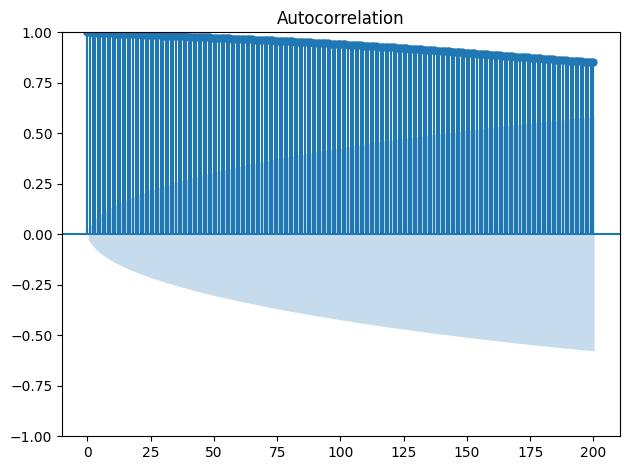

In [9]:
plot_acf(df.close,lags=200).tight_layout()


#### Step 2: Difference the model

In [10]:
# differencing twice
diff_close = np.diff(df['close'], n=2)

# performing the augmented dickey-fuller test
result = adfuller(diff_close)
print("ADF statistics: %f" %result[0])
print('p-value: %f' %result[1])

ADF statistics: -20.425597
p-value: 0.000000


- With 1st order differencing the series is stationary,this can be supported by the large ADF statistics of -20.4 and a p-value of 0 which less than the significance of 0.05.
- Therefore we reject the null hypothesis and conclude that this process has no unit root hence stationary.

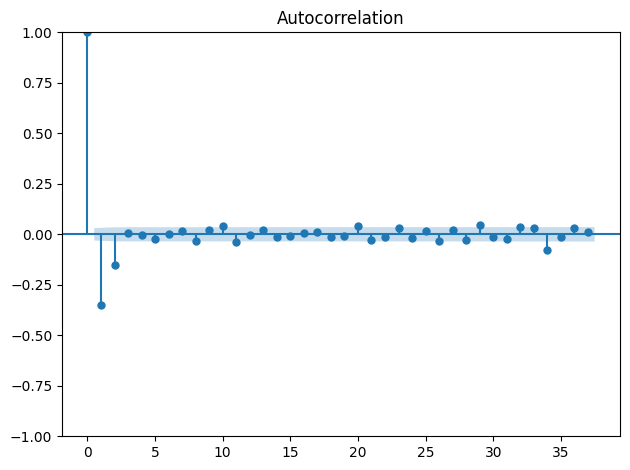

In [11]:
# plot the autocorrelation function

plot_acf(diff_close).tight_layout()